In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error

color_pal = sns.color_palette()

In [2]:
df = pd.read_csv('C:\\Users\\Sidharth Serjy\\Documents\\Kaggle Knowledge\\PJME_hourly.csv')
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)
#print(df.iloc[287])


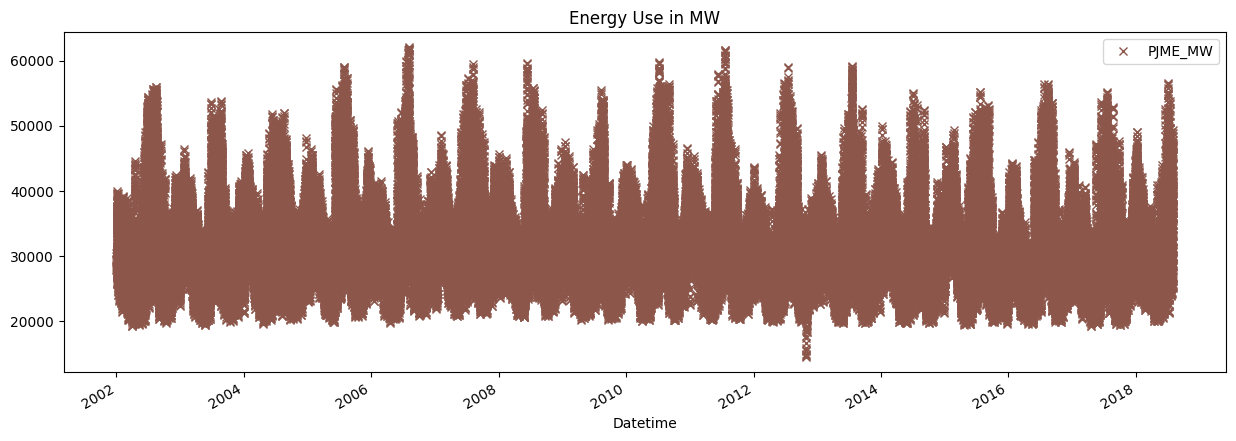

In [3]:
df.plot(style= 'x',
        color = color_pal[5],
        figsize=[15,5],
        title = 'Energy Use in MW')
plt.show()

In [4]:
#Train Test data 
test = df.loc[df.index >='2015']
train = df.loc[df.index <'2015']


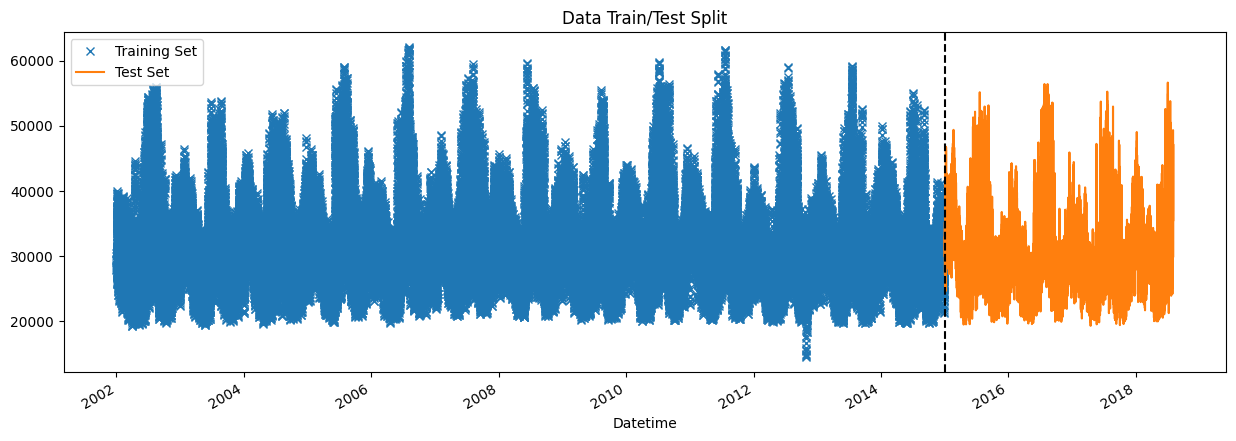

In [5]:
fig,ax = plt.subplots(figsize = (15,5))
train.plot(ax=ax,label = "Training Set",style = 'x', title="Data Train/Test Split")
test.plot(ax=ax, label = "Test Data ")
ax.legend(["Training Set","Test Set"])
ax.axvline("01-01-2015",color = 'black',ls = "--")
plt.show()

<Axes: xlabel='Datetime'>

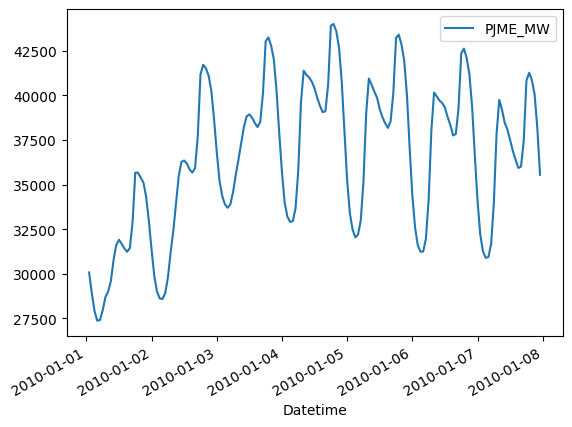

In [6]:
#plotting for a specific period (8 months)
df.loc[(df.index > "01-01-2010") & (df.index < "01-08-2010")].plot()

In [7]:
#Feature creation 

def create_features(df):
    df = df.copy()  
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df["quarter"] = df.index.quarter
    df["month"] = df.index.month
    df["year"]  = df.index.year
    df["day"] = df.index.dayofyear
    return df

In [8]:
df = create_features(df)

C:\Users\Sidharth Serjy\AppData\Local\Temp\ipykernel_11528\3583622789.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = "month", y = "PJME_MW", palette = "Blues")


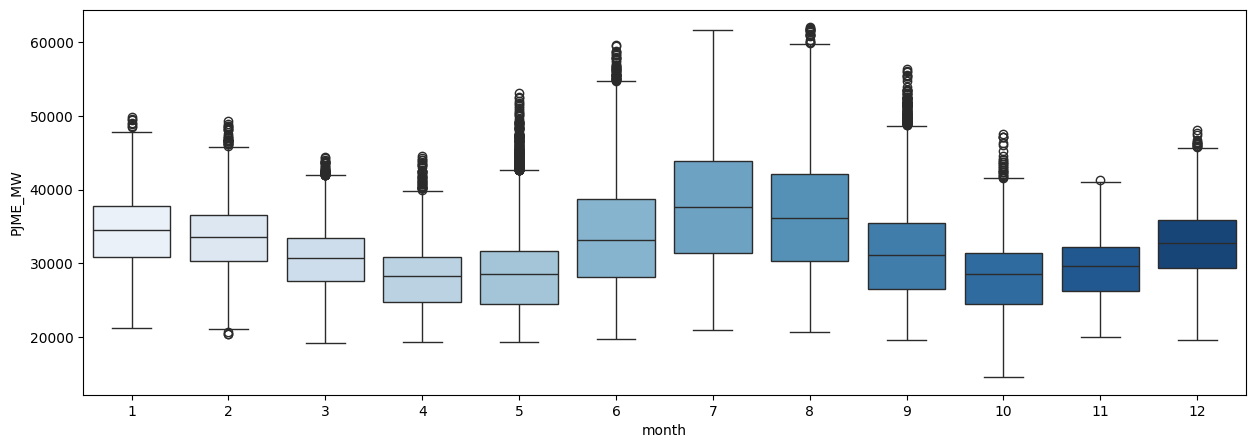

In [9]:
#Feture Visualisation 
fig,ax = plt.subplots(figsize = (15,5))
sns.boxplot(data = df, x = "month", y = "PJME_MW", palette = "Blues")
plt.show()

In [10]:
df.columns

Index(['PJME_MW', 'hour', 'dayofweek', 'quarter', 'month', 'year', 'day'], dtype='object')

In [11]:
#Model Creation

train = create_features(train)
test = create_features(test)

Features = ['hour', 'dayofweek', 'quarter', 'month', 'year', 'day']
Target = ['PJME_MW']

X_train = train[Features]
y_train = train[Target]

X_test = test[Features]
y_test = test[Target]



In [12]:
reg = xgb.XGBRegressor(n_estimators = 1000,
                       early_stopping_rounds = 50,
                       learning_rate = 0.01,
                       booster = 'gbtree')


reg.fit(X_train,y_train,
        eval_set=[(X_train,y_train),(X_test,y_test)],
        verbose = 100
        )

[0]	validation_0-rmse:6407.35736	validation_1-rmse:6479.81619
[100]	validation_0-rmse:3911.97994	validation_1-rmse:4312.03224
[200]	validation_0-rmse:3244.38509	validation_1-rmse:3864.56545
[300]	validation_0-rmse:2996.08999	validation_1-rmse:3748.76687
[400]	validation_0-rmse:2830.28024	validation_1-rmse:3744.93340
[416]	validation_0-rmse:2804.52217	validation_1-rmse:3748.41719


XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [13]:
fi = pd.DataFrame(data = reg.feature_importances_,
             index = reg.feature_names_in_,
             columns = ['Importance']
             )

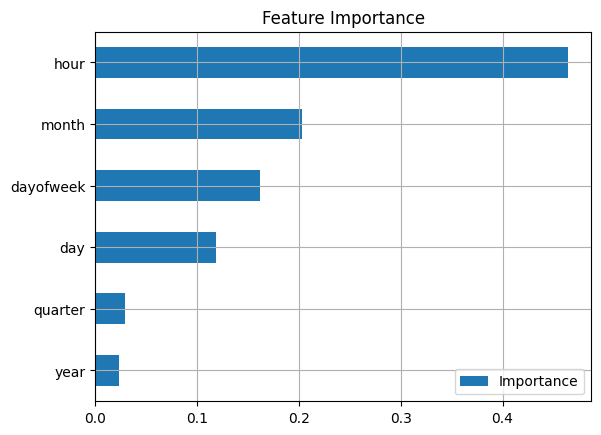

In [14]:
fi.sort_values('Importance').plot(kind = 'barh',title = "Feature Importance", grid= True)
plt.show()

Forecast on Test

In [15]:
test['Prediction'] = reg.predict(X_test)

In [16]:
df = df.merge(test[["Prediction"]],how = "left",left_index=True, right_index= True)

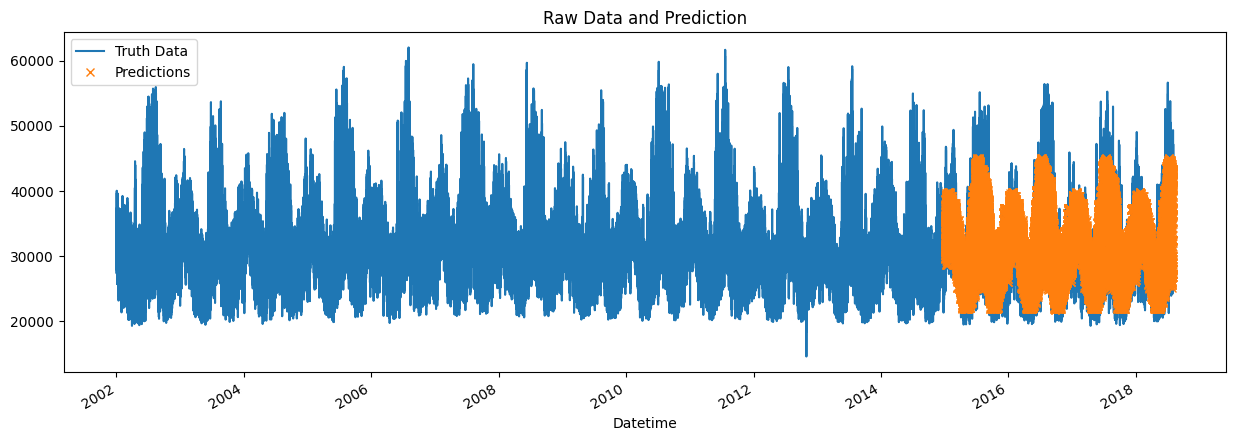

In [17]:
ax = df[['PJME_MW']].plot(figsize=[15,5])
df['Prediction'].plot(ax  =ax, style = "x")
plt.legend(['Truth Data','Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

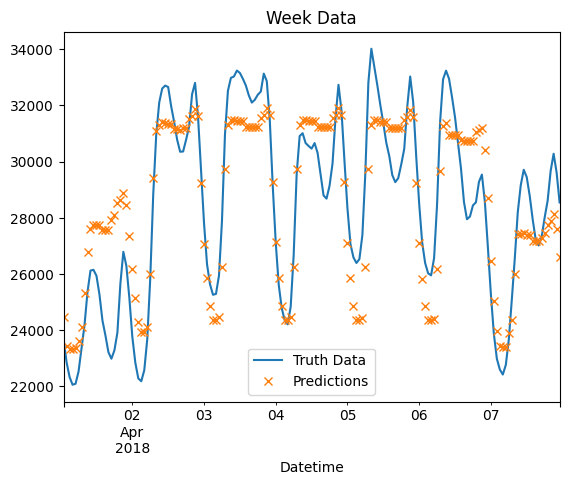

In [18]:
df.loc[(df.index > "04-01-2018") & (df.index < "04-08-2018")]['PJME_MW'].plot(title="Week Data")
df.loc[(df.index > "04-01-2018") & (df.index < "04-08-2018")]['Prediction'].plot(style="x")
plt.legend(["Truth Data", "Predictions"])
plt.show()
